In [1]:
import tensorflow.keras as keras
keras.__version__

'2.12.0'

In [2]:
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [5]:
from tensorflow.keras import layers
from tensorflow.keras import models

## First model with no augmentation

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
from keras.utils import to_categorical

train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
history = model.fit(train_images, train_labels, validation_split = 0.2, epochs=70, batch_size=128)

Epoch 1/70
313/313 [==============================] - 15s 11ms/step - loss: 1.7494 - accuracy: 0.3508 - val_loss: 1.5196 - val_accuracy: 0.4519
Epoch 2/70
313/313 [==============================] - 2s 7ms/step - loss: 1.3888 - accuracy: 0.4988 - val_loss: 1.3089 - val_accuracy: 0.5317
Epoch 3/70
313/313 [==============================] - 2s 7ms/step - loss: 1.2525 - accuracy: 0.5543 - val_loss: 1.2539 - val_accuracy: 0.5587
Epoch 4/70
313/313 [==============================] - 2s 8ms/step - loss: 1.1552 - accuracy: 0.5909 - val_loss: 1.1598 - val_accuracy: 0.5889
Epoch 5/70
313/313 [==============================] - 3s 11ms/step - loss: 1.0988 - accuracy: 0.6119 - val_loss: 1.1208 - val_accuracy: 0.6056
Epoch 6/70
313/313 [==============================] - 4s 13ms/step - loss: 1.0404 - accuracy: 0.6356 - val_loss: 1.1123 - val_accuracy: 0.6075
Epoch 7/70
313/313 [==============================] - 3s 9ms/step - loss: 0.9861 - accuracy: 0.6539 - val_loss: 1.0358 - val_accuracy: 0.6326
Ep

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 2.2700 - accuracy: 0.6776


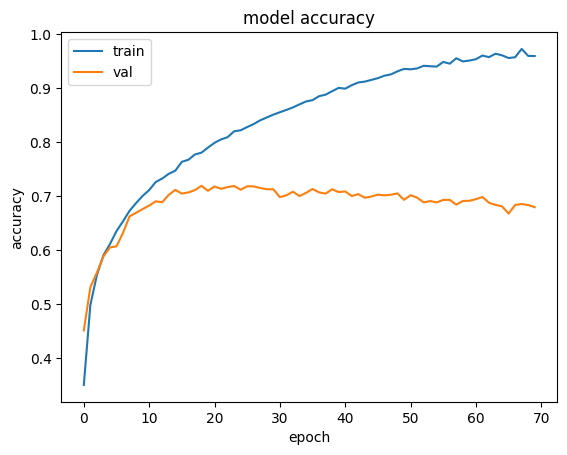

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

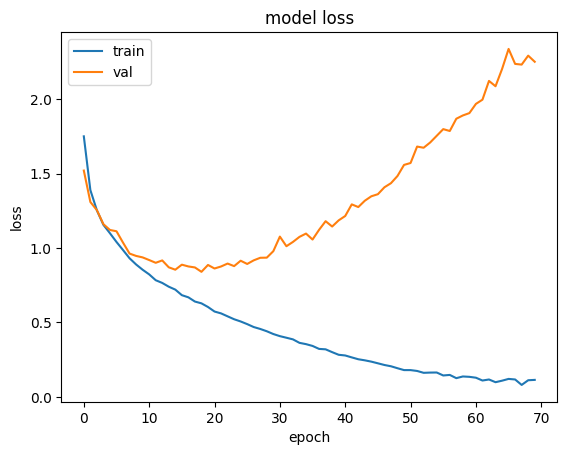

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

The plots show clear overfitting as only the training accuracy increases while the validation accuracy reaches a limit at its peak of around 69% accuracy

## Trying data augmentation

In [17]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [18]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [19]:
from sklearn.model_selection import train_test_split

train_images, validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size=0.2, shuffle=True)

In [20]:
from keras.preprocessing.image import ImageDataGenerator

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    )

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(
                                     train_images, train_labels, 
                                     batch_size=128)

validation_generator = validation_datagen.flow(
                                     validation_images, validation_labels, 
                                     batch_size=128)

test_generator = test_datagen.flow(
                                     test_images, test_labels, 
                                     batch_size=128)

In [ ]:
model_aug = models.Sequential()
model_aug.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_aug.add(layers.Flatten())
model_aug.add(layers.Dropout(0.5))
model_aug.add(layers.Dense(64, activation='relu'))
model_aug.add(layers.Dense(10, activation='softmax'))
model_aug.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history2 = model_aug.fit(train_generator, steps_per_epoch = len(train_images) / 128, 
                       epochs=50, validation_data=validation_generator)

Epoch 1/50
312/312 [==============================] - 29s 88ms/step - loss: 1.7975 - accuracy: 0.3305 - val_loss: 1.5495 - val_accuracy: 0.4436
Epoch 2/50
312/312 [==============================] - 27s 87ms/step - loss: 1.4941 - accuracy: 0.4537 - val_loss: 1.3173 - val_accuracy: 0.5135
Epoch 3/50
312/312 [==============================] - 29s 92ms/step - loss: 1.3853 - accuracy: 0.4977 - val_loss: 1.3466 - val_accuracy: 0.5287
Epoch 4/50
312/312 [==============================] - 27s 88ms/step - loss: 1.3125 - accuracy: 0.5289 - val_loss: 1.1260 - val_accuracy: 0.6005
Epoch 5/50
312/312 [==============================] - 27s 87ms/step - loss: 1.2515 - accuracy: 0.5516 - val_loss: 1.1481 - val_accuracy: 0.5887
Epoch 6/50
312/312 [==============================] - 27s 87ms/step - loss: 1.2016 - accuracy: 0.5705 - val_loss: 1.0792 - val_accuracy: 0.6137
Epoch 7/50
312/312 [==============================] - 28s 88ms/step - loss: 1.1743 - accuracy: 0.5800 - val_loss: 1.0490 - val_accuracy:

In [ ]:
test_loss, test_acc = model_aug.evaluate(test_generator)

79/79 [==============================] - 1s 14ms/step - loss: 0.8109 - accuracy: 0.7307


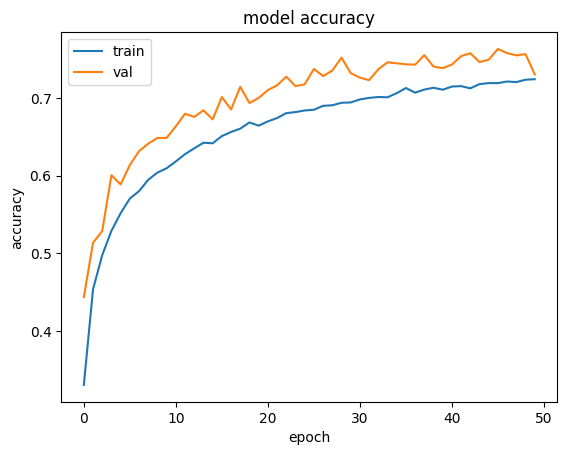

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

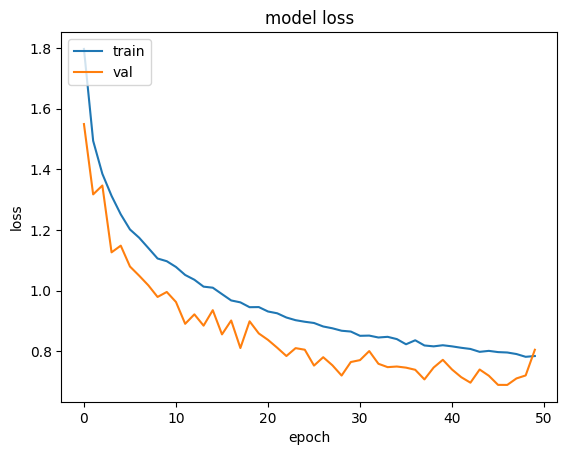

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Data augmentation fixes the overfitting issue as we can see both training and test accuracies are now around 73%

## Trying transfer learning using VGG16

As the current dataset is relatively small and it is similar to the imagenet dataset, we should use reuse the transfered model's parameters without fine tuning. So that is what I'll try first.

In [22]:
from keras.applications.imagenet_utils import preprocess_input

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    )

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,)

train_generator = train_datagen.flow(
                                     train_images, train_labels, 
                                     batch_size=128)

validation_generator = validation_datagen.flow(
                                     validation_images, validation_labels, 
                                     batch_size=128)

test_generator = test_datagen.flow(
                                     test_images, test_labels, 
                                     batch_size=128)

In [23]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

In [24]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [25]:
model_tl = models.Sequential()
model_tl.add(conv_base)
model_tl.add(layers.Flatten())
model_tl.add(layers.Dense(512, activation='relu'))
model_tl.add(layers.Dense(10, activation='softmax'))
model_tl.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model_tl.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14,982,474
Trainable params: 14,982,474
Non-trainable params: 0
_________________________________________________________________


In [27]:
conv_base.trainable = False

In [28]:
model_tl.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14,982,474
Trainable params: 267,786
Non-trainable params: 14,714,688
_________________________________________________________________


In [29]:
history3=model_tl.fit(train_generator, steps_per_epoch = len(train_images) / 128, 
                      epochs=50, validation_data=validation_generator)

Epoch 1/50
312/312 [==============================] - 37s 101ms/step - loss: 2.2262 - accuracy: 0.1818 - val_loss: 1.9155 - val_accuracy: 0.2164
Epoch 2/50
312/312 [==============================] - 32s 103ms/step - loss: 1.8472 - accuracy: 0.2447 - val_loss: 1.7203 - val_accuracy: 0.2913
Epoch 3/50
312/312 [==============================] - 31s 99ms/step - loss: 1.5593 - accuracy: 0.3914 - val_loss: 1.2889 - val_accuracy: 0.5028
Epoch 4/50
312/312 [==============================] - 32s 101ms/step - loss: 1.2503 - accuracy: 0.5325 - val_loss: 1.1971 - val_accuracy: 0.5824
Epoch 5/50
312/312 [==============================] - 32s 102ms/step - loss: 1.0620 - accuracy: 0.6199 - val_loss: 0.9683 - val_accuracy: 0.6526
Epoch 6/50
312/312 [==============================] - 30s 97ms/step - loss: 0.9629 - accuracy: 0.6633 - val_loss: 0.9264 - val_accuracy: 0.6815
Epoch 7/50
312/312 [==============================] - 32s 103ms/step - loss: 0.8936 - accuracy: 0.6917 - val_loss: 0.9133 - val_accu

In [30]:
test_loss, test_acc = model_tl.evaluate(test_generator)

79/79 [==============================] - 2s 19ms/step - loss: 0.5408 - accuracy: 0.8594


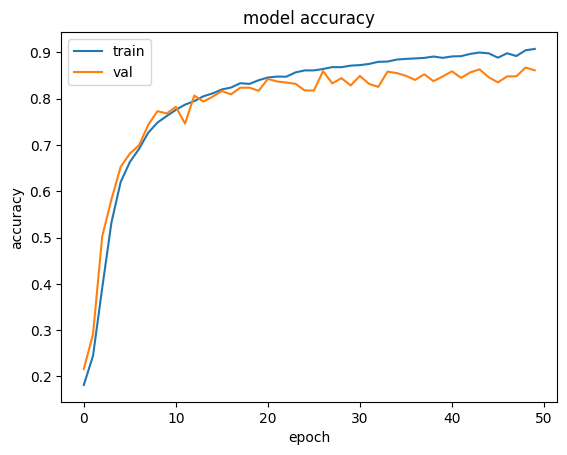

In [31]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

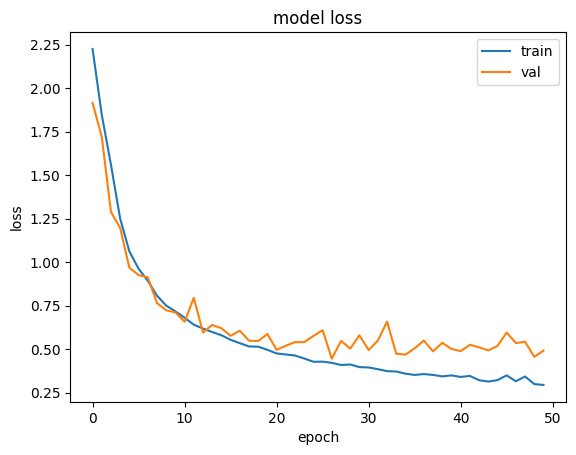

In [32]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

Using ransfer learning shows a big jump in accuracy.

An early stopping technique could be implemented as it is shown that the validation accuracy peaks at around 84% starting from the 30th epoch and oscillates after that around that accuracy.

## Trying a fine-tuned model

In [33]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,    
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    )

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,)

train_generator = train_datagen.flow(
                                     train_images, train_labels, 
                                     batch_size=128)

validation_generator = validation_datagen.flow(
                                     validation_images, validation_labels, 
                                     batch_size=128)

test_generator = test_datagen.flow(
                                     test_images, test_labels, 
                                     batch_size=128)

In [34]:
conv_base2 = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

In [35]:
conv_base2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [36]:
model_tl2 = models.Sequential()
model_tl2.add(conv_base2)
model_tl2.add(layers.Flatten())
model_tl2.add(layers.Dense(512, activation='relu'))
model_tl2.add(layers.Dense(10, activation='softmax'))
model_tl2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
conv_base2.trainable = False

In [38]:
model_tl2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14,982,474
Trainable params: 267,786
Non-trainable params: 14,714,688
_________________________________________________________________


In [39]:
history4=model_tl2.fit(train_generator, steps_per_epoch = len(train_images) / 128, 
                       epochs=5, validation_data=validation_generator)

Epoch 1/5
312/312 [==============================] - 37s 99ms/step - loss: 2.0752 - accuracy: 0.2236 - val_loss: 1.7428 - val_accuracy: 0.3239
Epoch 2/5
312/312 [==============================] - 31s 98ms/step - loss: 1.6023 - accuracy: 0.3844 - val_loss: 1.4856 - val_accuracy: 0.4382
Epoch 3/5
312/312 [==============================] - 30s 96ms/step - loss: 1.3250 - accuracy: 0.5090 - val_loss: 1.2463 - val_accuracy: 0.5316
Epoch 4/5
312/312 [==============================] - 31s 99ms/step - loss: 1.1323 - accuracy: 0.5936 - val_loss: 1.0219 - val_accuracy: 0.6418
Epoch 5/5
312/312 [==============================] - 34s 107ms/step - loss: 0.9942 - accuracy: 0.6531 - val_loss: 1.0254 - val_accuracy: 0.6580


In [40]:
conv_base2.trainable = True
set_trainable = False
for layer in conv_base2.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [41]:
model_tl2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14,982,474
Trainable params: 7,347,210
Non-trainable params: 7,635,264
_________________________________________________________________


In [42]:
history5=model_tl2.fit(train_generator, steps_per_epoch = len(train_images) / 128, 
                       epochs=50, validation_data=validation_generator)

Epoch 1/50
312/312 [==============================] - 32s 101ms/step - loss: 0.9105 - accuracy: 0.6873 - val_loss: 0.8409 - val_accuracy: 0.7134
Epoch 2/50
312/312 [==============================] - 30s 95ms/step - loss: 0.8408 - accuracy: 0.7139 - val_loss: 0.7832 - val_accuracy: 0.7389
Epoch 3/50
312/312 [==============================] - 30s 96ms/step - loss: 0.7865 - accuracy: 0.7347 - val_loss: 0.7618 - val_accuracy: 0.7418
Epoch 4/50
312/312 [==============================] - 31s 99ms/step - loss: 0.7303 - accuracy: 0.7548 - val_loss: 0.7418 - val_accuracy: 0.7558
Epoch 5/50
312/312 [==============================] - 30s 95ms/step - loss: 0.7047 - accuracy: 0.7656 - val_loss: 0.6557 - val_accuracy: 0.7864
Epoch 6/50
312/312 [==============================] - 31s 98ms/step - loss: 0.6665 - accuracy: 0.7788 - val_loss: 0.6266 - val_accuracy: 0.7939
Epoch 7/50
312/312 [==============================] - 30s 96ms/step - loss: 0.6400 - accuracy: 0.7860 - val_loss: 0.7486 - val_accuracy

In [43]:
test_loss, test_acc = model_tl2.evaluate(test_generator)

79/79 [==============================] - 2s 20ms/step - loss: 0.5567 - accuracy: 0.8514


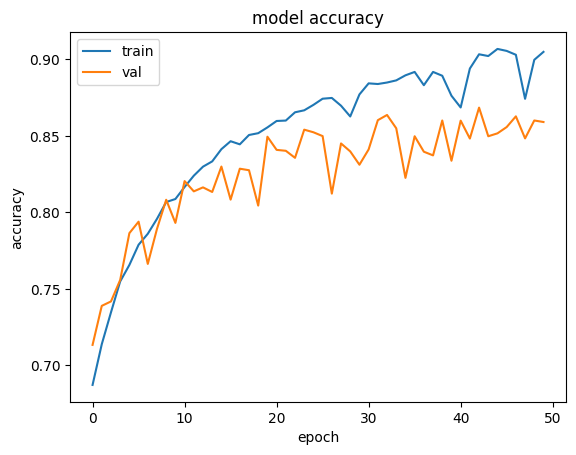

In [44]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

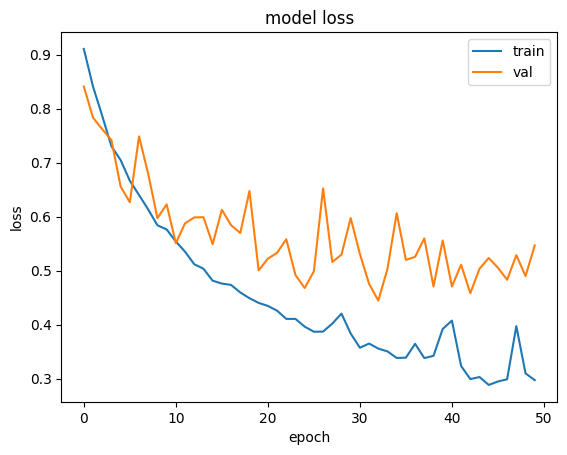

In [46]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

It is shown here that fine tuning the model doesn't add any accuracy over reusing it as it is because it is a similar dataset to the original one. So fine-tuning in this application is not recommended.